<div align="center">
    <h1>SICSS-Chile 2025</h1>
</div>

**Autor**: Adolfo Fuentes Jofré, PhD(c)

## Hands-on: Building Predictive Models for Political Behavior Using Supervised and Unsupervised Machine Learning Techniques

Este notebook ofrece una guía práctica para construir modelos predictivos enfocados en el comportamiento político utilizando técnicas de aprendizaje supervisado y no supervisado. Se estructura en pasos secuenciales que abarcan desde la cargaa de datos hasta la evaluación de modelos. A continuación, un resumen de su contenido:

1. **Introducción al Problema y Herramientas**  

   Se introduce el objetivo general: modelar el comportamiento político con herramientas de machine learning. Se destacan bibliotecas clave como pandas, scikit-learn y otras necesarias para análisis y modelado.
   <br>
   

2. **Preparación de Datos**  

   - **Cargar los datos**: Importar conjuntos de datos relevantes al análisis político.
   - **Visión general de los datos**: Exploración y comprensión inicial de las características.
   - **Creación de clases políticas**: Clasificación de los datos en categorías políticas relevantes para los objetivos del modelo.
<br>

3. **Análisis Descriptivo**  

   - Se realizan análisis estadísticos para entender patrones y relaciones en los datos.
<br>

4. **Preprocesamiento**  

   - Transformación y limpieza de los datos, incluyendo preparación de características para su uso en algoritmos de machine learning.
<br>

5. **Modelado Supervisado**  

   - Entrenamiento de modelos como Support Vector Machines (SVM), Decision Trees (DT) y Random Forests (RF).
   - **Evaluación del desempeño**: Uso de métricas como matriz de confusión, precisión, sensibilidad, curva ROC y área bajo la curva (AUC).
<br>

6. **Validación y Generalización**  

   - Énfasis en evitar sobreajuste mediante estrategias de validación como división train-test.
<br>

7. **Ingeniería de Características**  

   - Creación y selección de variables relevantes para mejorar el rendimiento del modelo.
<br>

8. **Selección del Modelo Final** 

   - Comparación entre modelos entrenados para identificar el más adecuado con base en métricas de desempeño.
<br>

### Objetivo Principal:

El objetivo del notebook es proporcionar habilidades prácticas y conocimientos teóricos para construir modelos predictivos en el ámbito político, con énfasis en cómo predecir comportamiento político utilizando datos estructurados y algoritmos de aprendizaje automático.



# Indice:

1. **Importar bibliotecas necesarias**
2. **Cargar los datos**
3. **Visión General de los Datos**
4. **Creación de Clases Políticas**
5. **Estadísticas Descriptivas**
6. **Supervised Machine Learning - Preprocesamiento**
7. **Supervised Machine Learning - Clasificación Binaria**
   - **Split Train-Test**
8. **Generalización y la Importancia de la Validación**
9. **Modelos**
    - **Support Vector Machine (SVM)**
    - **Decision Tree (DT)**
    - **Random Forest (RF)**
    - **Evaluación Modelos de Clasificación**
      - **Matriz de Confusión y Métricas de Performance**
      - **Estructura de la Matriz de Confusión**
      - **Métricas de Rendimiento**
      - **Elegimos RF**
      - **Curva ROC & AUC**
10. **Feature Engineering**


# 1. Importar bibliotecas necesarias 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import argparse
import json
import sys
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
#import shap
from scipy.interpolate import make_interp_spline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# 2. Cargar los datos

In [2]:
#Cargar el conjunto de datos y mostrar las primeras filas para entender su estructura

df = pd.read_csv('Data/Voters.csv')

In [3]:
# Mostrar las primeras filas
df.head()

,ID,sex,age,region,politica,region_custom,age_gen,z1,z2
0,0,Masculino,27,Biobío,2,Region,Millennial,0.572108,0.215063
1,1,Masculino,43,Metropolitana de Santiago,6,Capital City,Generation X,0.633335,0.264999
2,2,Femenino,39,Metropolitana de Santiago,3,Capital City,Generation X,0.499945,0.462515
3,3,Masculino,34,Metropolitana de Santiago,6,Capital City,Millennial,0.152297,0.382331
4,5,Femenino,37,Metropolitana de Santiago,0,Capital City,Millennial,0.288385,0.269820


# 3. Visión General de los Datos

Describir la estructura básica de los datos, incluyendo el número total de filas y columnas.

In [4]:
print("Total de datos (filas, columnas):", df.shape)

Total de datos (filas, columnas): (21528, 9)


Contar y mostrar el número total de valores NaN en cada columna.

In [5]:
valores_faltantes = df.isnull().sum()
print("\nValores Faltantes:\n", valores_faltantes)


Valores Faltantes:
 ID               0
sex              0
age              0
region           0
politica         0
region_custom    0
age_gen          0
z1               0
z2               0
dtype: int64


# 4. Creación de Clases Políticas

Definir nuevas clases políticas basadas en criterios específicos. Para este ejemplo, se utiliza
la columna "politica" para crear dos categorizaciones diferentes:

1. Izquierda y Derecha:
   - 0-4: Izquierda
   - 6-10: Derecha


2. Categorías:
   - 0, 1, 2: Extrema Izquierda
   - 3, 4: Izquierda
   - 6, 7: Derecha
   - 8, 9, 10: Extrema Derecha

In [6]:
def izquierda_derecha(puntaje):
    if 0 <= puntaje <= 4:
        return 'Izquierda'
    elif 6 <= puntaje <= 10:
        return 'Derecha'
    else:
        return np.nan

def Categorias(puntaje):
    if puntaje in [0, 1, 2]:
        return 'Extrema Izquierda'
    elif puntaje in [3, 4]:
        return 'Izquierda'
    elif puntaje in [6, 7]:
        return 'Derecha'
    elif puntaje in [8, 9, 10]:
        return 'Extrema Derecha'
    else:
        return np.nan

In [7]:
df['Clasificacion_binaria'] = df['politica'].apply(izquierda_derecha)
df['Muticlase'] = df['politica'].apply(Categorias)

In [8]:
df.head()

,ID,sex,age,region,politica,region_custom,age_gen,z1,z2,Clasificacion_binaria,Muticlase
0,0,Masculino,27,Biobío,2,Region,Millennial,0.572108,0.215063,Izquierda,Extrema Izquierda
1,1,Masculino,43,Metropolitana de Santiago,6,Capital City,Generation X,0.633335,0.264999,Derecha,Derecha
2,2,Femenino,39,Metropolitana de Santiago,3,Capital City,Generation X,0.499945,0.462515,Izquierda,Izquierda
3,3,Masculino,34,Metropolitana de Santiago,6,Capital City,Millennial,0.152297,0.382331,Derecha,Derecha
4,5,Femenino,37,Metropolitana de Santiago,0,Capital City,Millennial,0.288385,0.269820,Izquierda,Extrema Izquierda


# 5. Estadísticas Descriptivas 

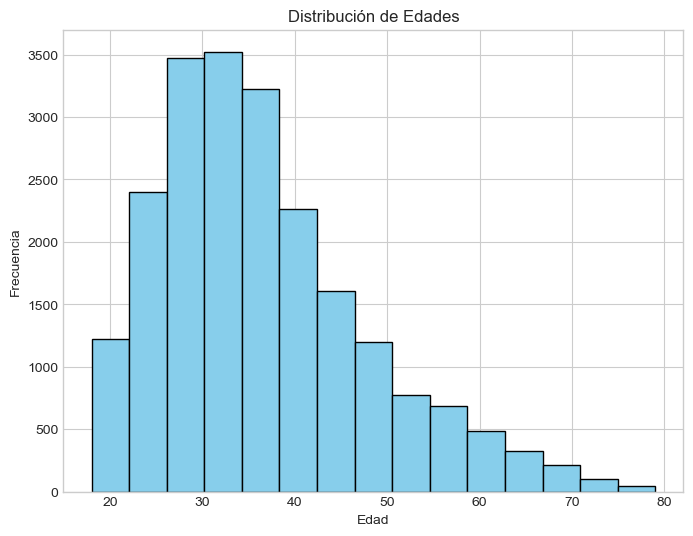

In [9]:
plt.style.use("seaborn-whitegrid")
# 1. Distribución de Edades
plt.figure(figsize=(8, 6))
df['age'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

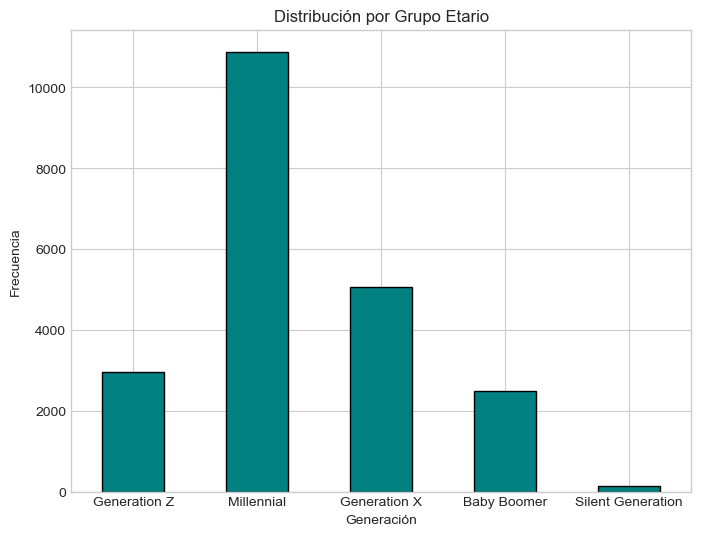

In [10]:
order = ['Generation Z', 'Millennial', 'Generation X', 'Baby Boomer', 'Silent Generation']
counts = df['age_gen'].value_counts().reindex(order)

# Plotting the bar chart with the corrected order
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribución por Grupo Etario')
plt.xlabel('Generación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

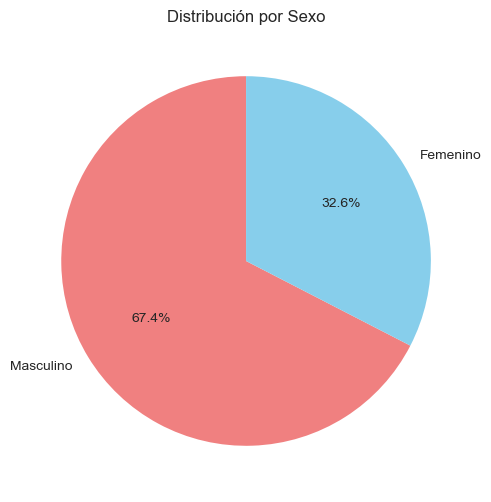

In [11]:
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución por Sexo')
plt.ylabel('')
plt.show()

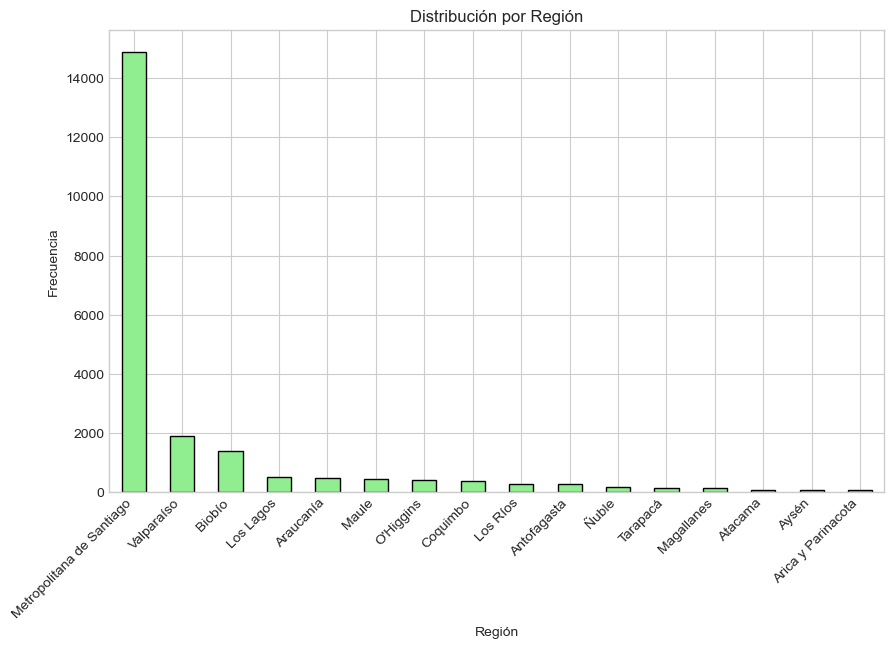

In [12]:
plt.figure(figsize=(10, 6))
df['region'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

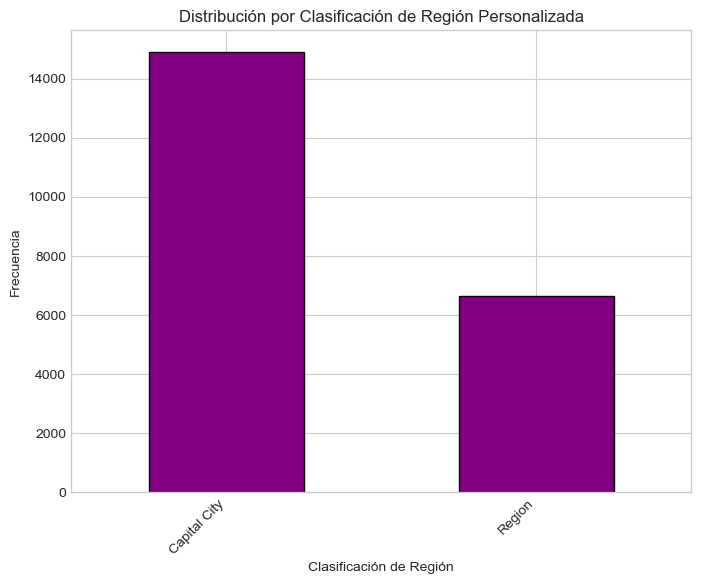

In [13]:
plt.figure(figsize=(8, 6))
df['region_custom'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribución por Clasificación de Región Personalizada')
plt.xlabel('Clasificación de Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

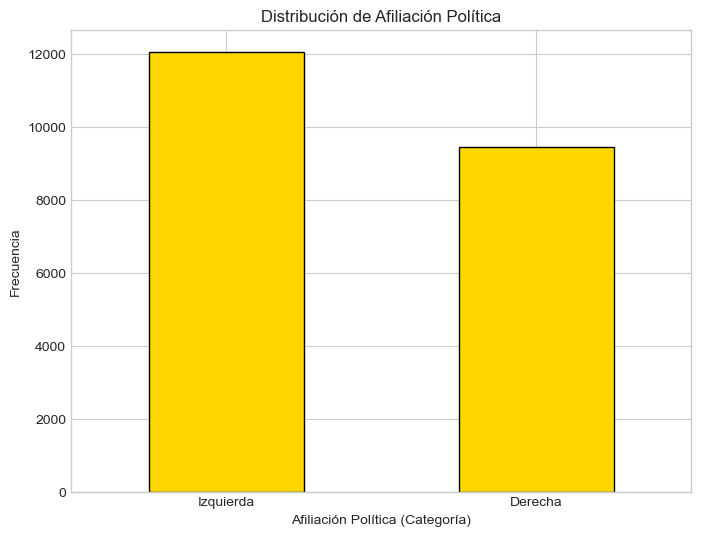

In [14]:
order = ['Izquierda', 'Derecha']
counts = df['Clasificacion_binaria'].value_counts().reindex(order)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Distribución de Afiliación Política')
plt.xlabel('Afiliación Política (Categoría)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

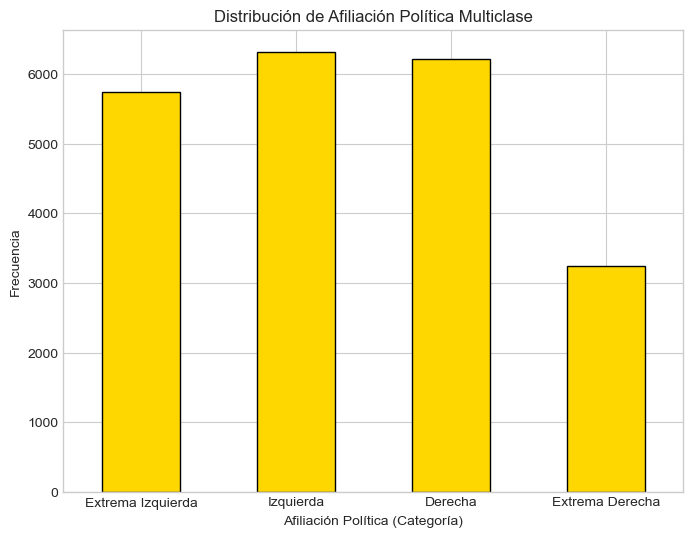

In [15]:
order = ['Extrema Izquierda', 'Izquierda', 'Derecha', 'Extrema Derecha']
counts = df['Muticlase'].value_counts().reindex(order)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Distribución de Afiliación Política Multiclase')
plt.xlabel('Afiliación Política (Categoría)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

# 6. Supervised Machine Learning - Preprocesamiento

In [16]:
df_model = df.drop(columns=["region",'age_gen','politica','ID'])
df_model.head()

,sex,age,region_custom,z1,z2,Clasificacion_binaria,Muticlase
0,Masculino,27,Region,0.572108,0.215063,Izquierda,Extrema Izquierda
1,Masculino,43,Capital City,0.633335,0.264999,Derecha,Derecha
2,Femenino,39,Capital City,0.499945,0.462515,Izquierda,Izquierda
3,Masculino,34,Capital City,0.152297,0.382331,Derecha,Derecha
4,Femenino,37,Capital City,0.288385,0.269820,Izquierda,Extrema Izquierda


In [17]:
# Se asigna un valor binario a la columna 'sex', reemplazando 'Femenino' con 0 y 'Masculino' con 1.
df_model['sex'] = df_model['sex'].replace({'Femenino': 0, 'Masculino': 1})

In [18]:
df_model['region_custom'] = df_model['region_custom'].replace({'Region': 0, 'Capital City': 1})

In [19]:
df_model.head()

,sex,age,region_custom,z1,z2,Clasificacion_binaria,Muticlase
0,1,27,0,0.572108,0.215063,Izquierda,Extrema Izquierda
1,1,43,1,0.633335,0.264999,Derecha,Derecha
2,0,39,1,0.499945,0.462515,Izquierda,Izquierda
3,1,34,1,0.152297,0.382331,Derecha,Derecha
4,0,37,1,0.288385,0.269820,Izquierda,Extrema Izquierda


In [20]:
df_model[['sex','age','region_custom']].describe()

,sex,age,region_custom
count,21528.000000,21528.000000,21528.000000
mean,0.674285,36.708751,0.691843
std,0.468652,11.140458,0.461742
min,0.000000,18.000000,0.000000
25%,0.000000,29.000000,0.000000
50%,1.000000,35.000000,1.000000
75%,1.000000,43.000000,1.000000
max,1.000000,79.000000,1.000000


# 7. Supervised Machine Learning - Clasificación Binaria

Dataset para clasificación binaria

In [21]:
df_model_binario = df_model.drop(columns=["Muticlase"])
df_model_binario.head()

,sex,age,region_custom,z1,z2,Clasificacion_binaria
0,1,27,0,0.572108,0.215063,Izquierda
1,1,43,1,0.633335,0.264999,Derecha
2,0,39,1,0.499945,0.462515,Izquierda
3,1,34,1,0.152297,0.382331,Derecha
4,0,37,1,0.288385,0.269820,Izquierda


In [22]:
df_model_binario['Clasificacion_binaria'] = df_model_binario['Clasificacion_binaria'].replace({'Izquierda': 0, 'Derecha': 1})
df_model_binario.head()

,sex,age,region_custom,z1,z2,Clasificacion_binaria
0,1,27,0,0.572108,0.215063,0
1,1,43,1,0.633335,0.264999,1
2,0,39,1,0.499945,0.462515,0
3,1,34,1,0.152297,0.382331,1
4,0,37,1,0.288385,0.269820,0


In [23]:
# Definir X (características) e y (target)
X = df_model_binario[['sex','age','region_custom']]
y = df_model_binario["Clasificacion_binaria"]

In [24]:
X

,sex,age,region_custom
0,1,27,0
1,1,43,1
2,0,39,1
3,1,34,1
4,0,37,1
...,...,...,...
21523,1,43,0
21524,1,36,1
21525,1,52,0
21526,0,31,0


In [25]:
y

0        0
1        1
2        0
3        1
4        0
        ..
21523    0
21524    1
21525    1
21526    0
21527    0
Name: Clasificacion_binaria, Length: 21528, dtype: int64

# 8. Generalización y la Importancia de la Validación

Un modelo bien entrenado no solo debe aprender a realizar predicciones precisas sobre los datos de entrenamiento, sino también generalizar bien a datos nuevos que nunca ha visto antes. Este concepto es clave para evitar problemas como:

- **Overfitting:** Cuando el modelo memoriza los datos de entrenamiento pero falla en generalizar a nuevos datos.
- **Underfitting:** Cuando el modelo es demasiado simple y no captura patrones importantes, resultando en bajo desempeño tanto en entrenamiento como en validación.

Para evaluar la capacidad de generalización de un modelo, se utilizan dos enfoques principales:

1. **In-Sample (Dentro de la Muestra):** Evalúa el desempeño del modelo usando los datos de entrenamiento. Esto mide qué tan bien el modelo ajusta los datos vistos, pero no dice nada sobre su capacidad de generalizar.
2. **Out-of-Sample (Fuera de la Muestra):** Evalúa el modelo en datos nuevos no utilizados durante el entrenamiento. Esto es crucial para medir la capacidad de generalización.

La división de datos en conjuntos de entrenamiento, validación y prueba ayuda a medir estas capacidades. El siguiente diagrama ilustra esta idea:

## Split Train-Test

Una de las técnicas más comunes para evaluar un modelo de Machine Learning es dividir el conjunto de datos en dos partes: entrenamiento y prueba. Esta técnica, conocida como Split Train-Test, asegura que el modelo sea entrenado en una porción de los datos y evaluado en otra porción completamente separada, lo que permite medir su capacidad de generalización.

<img src="Imagenes/Split_Train_Test.jpg" alt="Chollet, F., & Chollet, F. (2021). Deep learning with Python. Simon and Schuster![image.png](attachment:image.png)" width="600" height="400">

**Figure 5.12 Simple hold-out validation split. Chollet, F., & Chollet, F. (2021). Deep learning with Python. Simon and Schuster.**

Dividir el conjunto de datos en entrenamiento y prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Verificar las formas de los conjuntos divididos
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15069, 3)
Shape of X_test: (6459, 3)
Shape of y_train: (15069,)
Shape of y_test: (6459,)


# 9. Modelos

## 9.1. Support Vector Machine (SVM) 

SVM (*Support Vector Machine*) es un modelo de aprendizaje supervisado cuyo objetivo principal es encontrar el **hiperplano óptimo** que separa los datos en distintas clases. Este hiperplano no solo separa las clases, sino que maximiza el **margen** entre ellas, es decir, la distancia entre los puntos más cercanos de cada clase y el hiperplano. A continuación, se detallan los conceptos clave:

- **Hiperplano:** Es la frontera de decisión que separa las clases. En un problema de dos dimensiones, este es una línea; en tres dimensiones, un plano; y en dimensiones mayores, un hiperplano.  
- **Margen:** La distancia máxima entre el hiperplano y los puntos más cercanos de cada clase, asegurando que las clases estén bien separadas.  
- **Vectores de Soporte:** Son los puntos más cercanos al hiperplano que determinan la posición y orientación del margen. Estos puntos son críticos para definir la solución óptima.  

La siguiente visualización ilustra el hiperplano, el margen y los vectores de soporte:  
*<img src="Imagenes/SVC.jpg" alt="" width="600" height="400">*

**Visualización de SVM: Hiperplano, Margen y Vectores de Soporte. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.**

### Parámetros del Modelo SVC

El modelo SVM de `scikit-learn` se implementa a través de `SVC` (*Support Vector Classifier*). Este modelo ofrece gran flexibilidad gracias a varios hiperparámetros clave que controlan su comportamiento y adaptabilidad a diferentes tipos de datos.

#### **1. Kernel (Linear vs. No Linear)**

El parámetro `kernel` especifica el tipo de función que se utilizará para transformar los datos y encontrar el hiperplano óptimo. 

- **`kernel='linear'`:** Utiliza un hiperplano lineal para separar las clases. Es adecuado cuando los datos son linealmente separables. Este tipo de modelo es más simple y eficiente computacionalmente.  
- **`kernel='rbf'` o `kernel='poly'`:** Se utilizan para datos no linealmente separables, donde se necesita un mapeo a un espacio de mayor dimensión. Estos permiten encontrar fronteras de decisión más complejas.  

#### **2. Parámetro `C`**

El parámetro `C` controla el equilibrio entre maximizar el margen y minimizar el error de clasificación.  
- **Valor bajo de `C`:** Permite un margen más amplio, pero tolera más errores de clasificación (es decir, algunos puntos pueden quedar en el lado incorrecto del margen). Esto es útil cuando se busca mayor generalización.  
- **Valor alto de `C`:** Penaliza fuertemente los errores de clasificación, lo que da lugar a un margen más ajustado. Sin embargo, esto puede aumentar el riesgo de sobreajuste (*overfitting*).  


In [28]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [29]:
acc = metrics.accuracy_score(y_test, y_pred_svm)
acc

0.5502399752283635

## 9.2. Decision Tree (DT) 

Un árbol de decisión es un modelo de aprendizaje supervisado que utiliza una estructura jerárquica para tomar decisiones basadas en una serie de preguntas del tipo "sí/no". Es uno de los algoritmos más interpretables y fáciles de entender en Machine Learning. Se utiliza tanto para problemas de clasificación como de regresión.

#### Conceptos Clave:

- **Estructura Jerárquica:** El modelo se organiza como un árbol, donde:
  - Los **nodos internos** representan decisiones basadas en características.
  - Las **ramas** representan los posibles resultados de una decisión.
  - Las **hojas** representan predicciones finales (clases o valores).

- **División de Datos:** En cada nodo, el conjunto de datos se divide en función de una característica y un punto de corte que mejor separa las clases o predice el valor objetivo. 

- **Corte en Características:** Los puntos de corte se eligen para minimizar un criterio de error, como la la entropía del nodo (en clasificación) o el **error cuadrático medio** (en regresión).

#### Ejemplo de Árbol de Decisión:
*<img src="Imagenes/DT1.jpg" alt="" width="600" height="400">*

Fronteras de decisión de un árbol con un nivel de profundidad (izquierda) y su representación como árbol de decisión (derecha) 

*<img src="Imagenes/DT2.jpg" alt="" width="600" height="400">*

Fronteras de decisión de un árbol con dos niveles de profundidad (izquierda) y su representación como árbol de decisión (derecha)

**Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc."**

### Parámetros Clave del Modelo DecisionTree

Los árboles de decisión, implementados en `scikit-learn` a través de `DecisionTreeClassifier` (para clasificación) y `DecisionTreeRegressor` (para regresión), cuentan con varios hiperparámetros que controlan su comportamiento y previenen problemas como el **overfitting**.

#### **1. Profundidad Máxima (`max_depth`)**
- Este parámetro limita la cantidad de divisiones en el árbol, controlando su tamaño y complejidad.
- **Profundidad baja:** Resulta en un modelo simple con menor capacidad de ajuste (riesgo de underfitting).
- **Profundidad alta:** Permite que el árbol se ajuste más a los datos, pero puede llevar al sobreajuste (*overfitting*).
  

#### **2. Criterio de División (`criterion`)**
- Define cómo se mide la calidad de las divisiones en los nodos.
  - **`gini`:** Minimiza la impureza de Gini en los nodos (valor por defecto para clasificación).
  - **`entropy`:** Maximiza la ganancia de información en cada división.
  - **`mse`:** Error cuadrático medio, utilizado para problemas de regresión.


In [30]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

In [31]:
acc = metrics.accuracy_score(y_test, y_pred_dt)
acc

0.552717138875987

## 9.3. Random Forest (RF)

**Random Forest** es un modelo de aprendizaje supervisado basado en el concepto de **ensembles** (*modelos combinados*), que utiliza múltiples árboles de decisión para mejorar la precisión, reducir el sobreajuste (*overfitting*) y aumentar la capacidad de generalización. Este método es ampliamente utilizado tanto para problemas de **clasificación** como de **regresión** debido a su robustez, flexibilidad y facilidad de uso.

#### ¿Cómo Funciona Random Forest?

1. **Construcción del Bosque**:
   - Random Forest genera múltiples **árboles de decisión** a partir de diferentes subconjuntos del conjunto de datos original. Estos subconjuntos se obtienen mediante un método conocido como **bootstrap sampling** (muestras con reemplazo).
   - Para construir cada árbol, se selecciona un subconjunto aleatorio de características en cada nodo, lo que introduce diversidad y reduce la correlación entre los árboles.
   

2. **Predicción**:
   - En **clasificación**, el modelo toma la clase más votada entre todos los árboles (votación por mayoría).
   - En **regresión**, se calcula el promedio de las predicciones de todos los árboles.
   

*<img src="Imagenes/RF1.jpg" alt="" width="300" height="500">*

**Yang, P., Hwa Yang, Y., B Zhou, B., & Y Zomaya, A. (2010). A review of ensemble methods in bioinformatics. Current Bioinformatics, 5(4), 296-308.**

*<img src="Imagenes/RF2.jpg" alt="" width="600" height="400">*
 
**Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc."**

### Parámetros Clave de Random Forest


#### **1. Número de Árboles (`n_estimators`)**
- Este parámetro determina cuántos árboles de decisión se crearán en el modelo.
- Un mayor número de árboles suele mejorar la precisión, pero también incrementa el tiempo de entrenamiento y predicción.
  

#### **2. Número Máximo de Características (`max_features`)**
- Especifica cuántas características considerar al buscar la mejor división en cada nodo.
  - **`sqrt` (por defecto en clasificación):** Usa la raíz cuadrada del número total de características.
  - **`log2`:** Usa el logaritmo en base 2 del número total de características.
  - **Número entero:** Usa una cantidad fija de características.
- Limitar las características ayuda a reducir la correlación entre los árboles, aumentando su capacidad de generalización.

#### **3. Profundidad Máxima de los Árboles (`max_depth`)**
- Controla el tamaño máximo de cada árbol, lo que evita que los árboles crezcan demasiado y sobreajusten los datos.



In [32]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [33]:
acc = metrics.accuracy_score(y_test, y_pred_rf)
acc

0.5606130980027868

## 9.4 Evaluación Modelos de Clasificación

## Matriz de Confusión y Métricas de Performance

La **matriz de confusión** es una herramienta esencial para evaluar cómo está funcionando un modelo de aprendizaje automático, especialmente en tareas de clasificación. Proporciona una representación clara de las predicciones del modelo comparadas con los valores reales (*Ground Truth*).

## Estructura de la Matriz de Confusión
La matriz de confusión tiene cuatro elementos principales:

| Predicted / Ground Truth | Positivo (+)     | Negativo (-)     |
|---------------------------|------------------|------------------|
| **Positivo (+)**          | True Positive (TP) | False Positive (FP) |
| **Negativo (-)**          | False Negative (FN) | True Negative (TN) |

- **True Positive (TP):** Predicciones correctas de la clase positiva.
- **True Negative (TN):** Predicciones correctas de la clase negativa.
- **False Positive (FP):** Predicciones incorrectas donde el modelo clasifica como positivo, pero es negativo.
- **False Negative (FN):** Predicciones incorrectas donde el modelo clasifica como negativo, pero es positivo.

## Métricas de Rendimiento

### **1. Accuracy (Precisión Global)**
Mide la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.  


### **2. Precision (Precisión Positiva)**
Indica la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo.  


### **3. Recall (Sensibilidad o Tasa de Verdaderos Positivos)**
Mide la proporción de predicciones positivas correctas entre todos los casos que realmente son positivos.  


### **4. ROC (Receiver Operating Characteristic)**
Es una curva que representa la relación entre la **tasa de verdaderos positivos (TPR)** y la **tasa de falsos positivos (FPR)** a través de diferentes umbrales. Nos ayuda a entender el comportamiento del modelo en escenarios con distintos puntos de decisión.

### **5. AUC (Área Bajo la Curva ROC)**
Es el área bajo la curva ROC. Mide la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor cercano a 1 indica un mejor rendimiento del modelo.



<img src="Imagenes/CM.jpg" alt="" width="797" height="500">

**Jeppesen, J. H., Jacobsen, R. H., Inceoglu, F., & Toftegaard, T. S. (2019). A cloud detection algorithm for satellite imagery based on deep learning. Remote sensing of environment, 229, 247-259.**

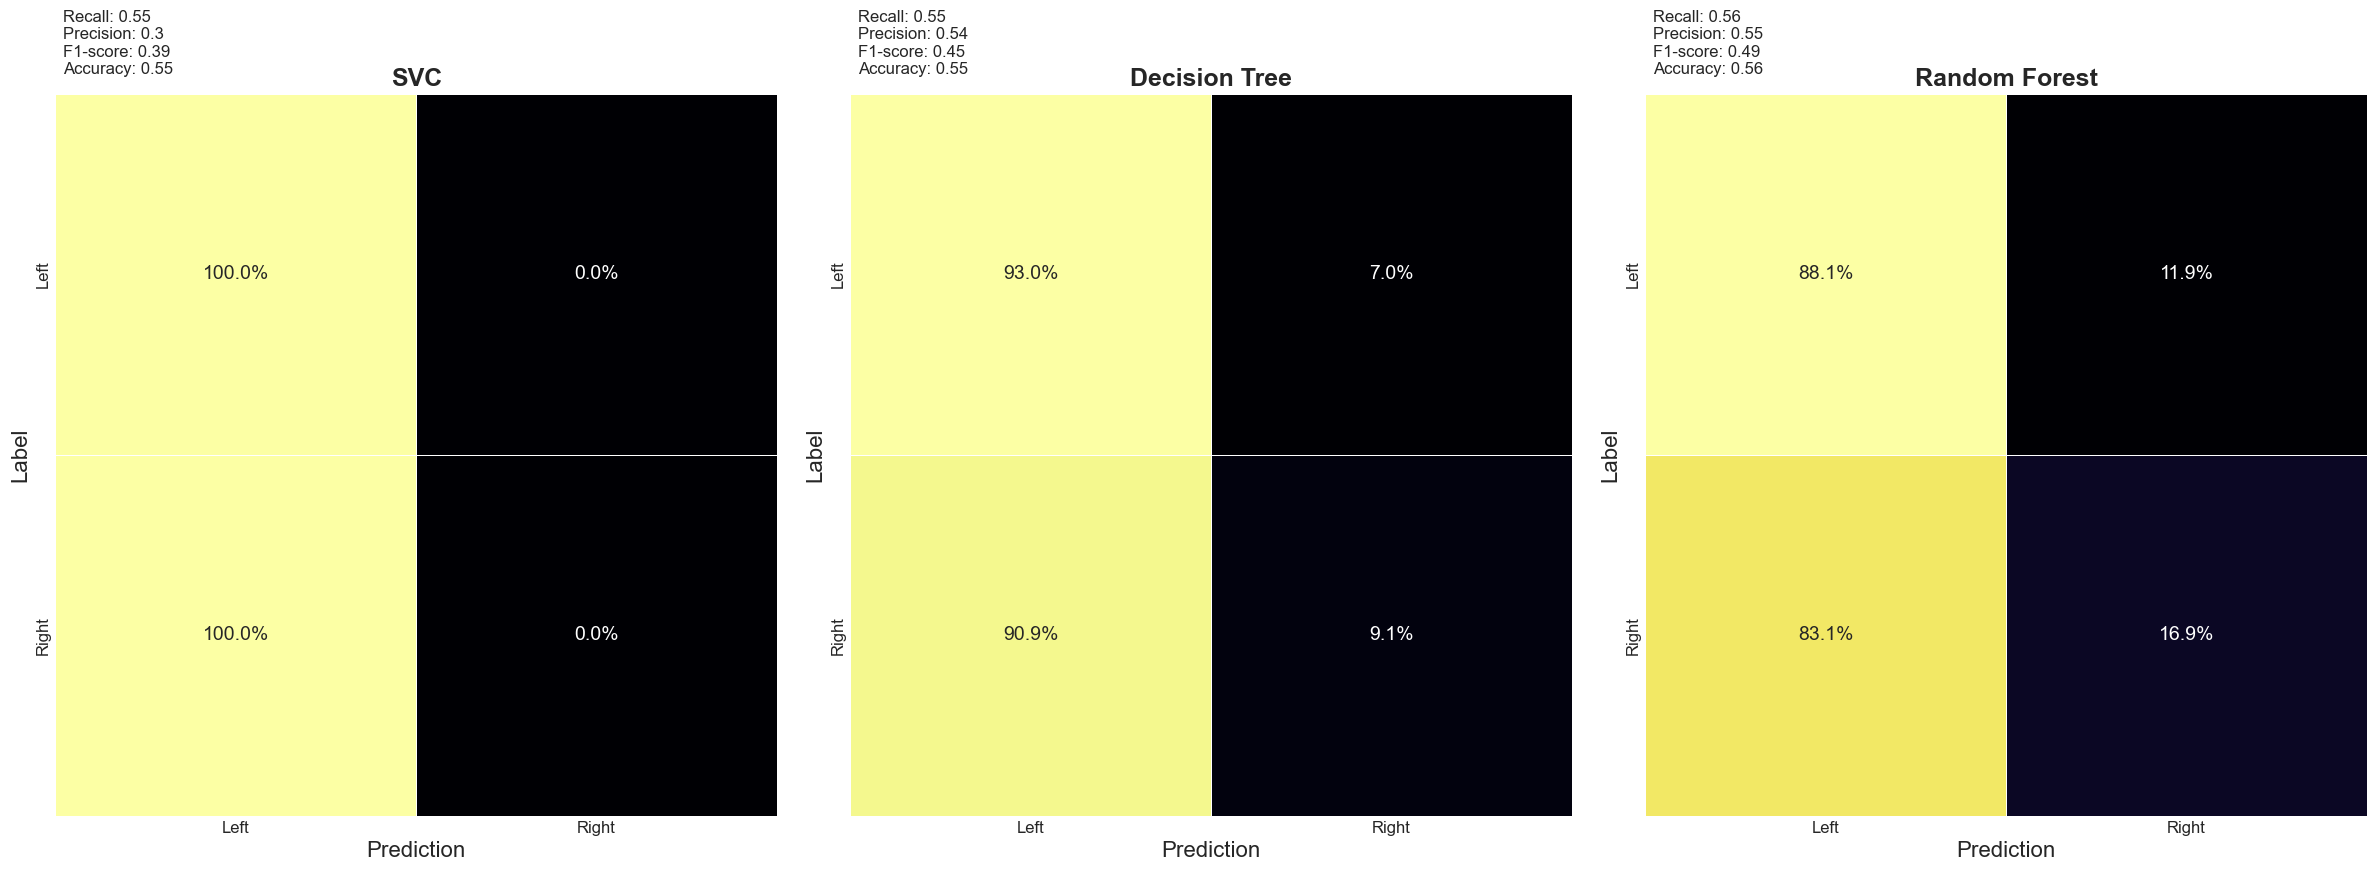

In [34]:
# Lista de modelos y sus predicciones
model_names = ['SVC', 'Decision Tree', 'Random Forest']
predictions = [y_pred_svm, y_pred_dt, y_pred_rf]  # Predicciones en el orden correcto
true_labels = y_test  # Etiquetas reales (común para todos los modelos)

# Clases del problema (ajustar según las clases reales)
classes = ['Left', 'Right']

# Configurar el tamaño del gráfico con subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 fila, 3 columnas

# Generación de matrices de confusión para cada modelo
for ax, model_name, y_pred in zip(axes, model_names, predictions):
    # Calcular métricas
    recall = recall_score(true_labels, y_pred, average='weighted')
    precision = precision_score(true_labels, y_pred, average='weighted')
    f1 = f1_score(true_labels, y_pred, average='weighted')
    acc = accuracy_score(true_labels, y_pred)

    # Crear la matriz de confusión
    matriz = confusion_matrix(true_labels, y_pred, normalize='true')

    # Dibujar la matriz de confusión en el subplot correspondiente
    sns.heatmap(matriz, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno',
                xticklabels=classes, yticklabels=classes, cbar=False, annot_kws={'size': 14}, ax=ax)

    # Etiquetas y título
    ax.set_title(f'{model_name}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Prediction', fontsize=16)
    ax.set_ylabel('Label', fontsize=16)

    # Agregar métricas como texto
    metrics_text = f'Recall: {round(recall, 2)}\nPrecision: {round(precision, 2)}\nF1-score: {round(f1, 2)}\nAccuracy: {round(acc, 2)}'
    ax.text(0.01, 1.07, metrics_text, va='center', transform=ax.transAxes, fontsize=12)

    # Ajustar tamaño de etiquetas
    ax.tick_params(axis='both', which='major', labelsize=12)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


--------------------------------------------------

# 10. Feature Engineering

El algoritmo **NOMINATE**, desarrollado por Keith T. Poole y Howard Rosenthal, es una herramienta fundamental en ciencia política para evaluar las posiciones ideológicas de los legisladores a través del análisis de sus patrones de votación (Hix, S., 2001). Esta técnica utiliza el método de **Escalamiento Multidimensional** (*Multidimensional Scaling, MDS*), que permite representar preferencias y decisiones en un espacio reducido y comprensible (Hix, S., 2001).

NOMINATE identifica dos dimensiones principales:
1. Un espectro económico de izquierda a derecha.
2. Actitudes sobre temas sociales y cuestiones transversales relevantes en cada contexto histórico.

Con el avance de la tecnología computacional, Poole y Rosenthal desarrollaron variantes del algoritmo NOMINATE (Poole, K. T., & Rosenthal, H., 2001; Carroll, R., et al., 2009). Los **puntos ideales** representan las máximas preferencias de los individuos, reflejando su tendencia a elegir opciones más cercanas a estos puntos. 

El procedimiento del algoritmo NOMINATE consta de tres pasos esenciales:
1. Estimación de los puntos ideales de cada legislador.
2. Determinación de las ubicaciones nominales para cada opción de votación.
3. Definición del parámetro de la función de utilidad del legislador.

*<img src="Imagenes/NOMINATE.jpg" alt="" width="877" height="412">*

**Ideological voting on passage of Dodd-Frank changes, 2018. Blue symbols indicate Democrats, red symbols indicate Republicans, gray triangles indicate independents**

Incluir las Dimensiones Politicas

In [35]:
# Definir X (características) e y (target)
X1 = df_model_binario[['sex','age','region_custom','z1','z2']]
y1 = df_model_binario["Clasificacion_binaria"]

In [36]:
X1

,sex,age,region_custom,z1,z2
0,1,27,0,0.572108,0.215063
1,1,43,1,0.633335,0.264999
2,0,39,1,0.499945,0.462515
3,1,34,1,0.152297,0.382331
4,0,37,1,0.288385,0.269820
...,...,...,...,...,...
21523,1,43,0,0.354627,0.618174
21524,1,36,1,0.647223,0.204849
21525,1,52,0,0.815150,0.297094
21526,0,31,0,0.377025,0.308526


Repetiremos el mismo flujo

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [38]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train1, y_train1)
y_pred_svm1 = svm_model.predict(X_test1)

In [39]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model on the training data
dt_model.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_dt1 = dt_model.predict(X_test1)

In [40]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_rf1 = rf_model.predict(X_test1)

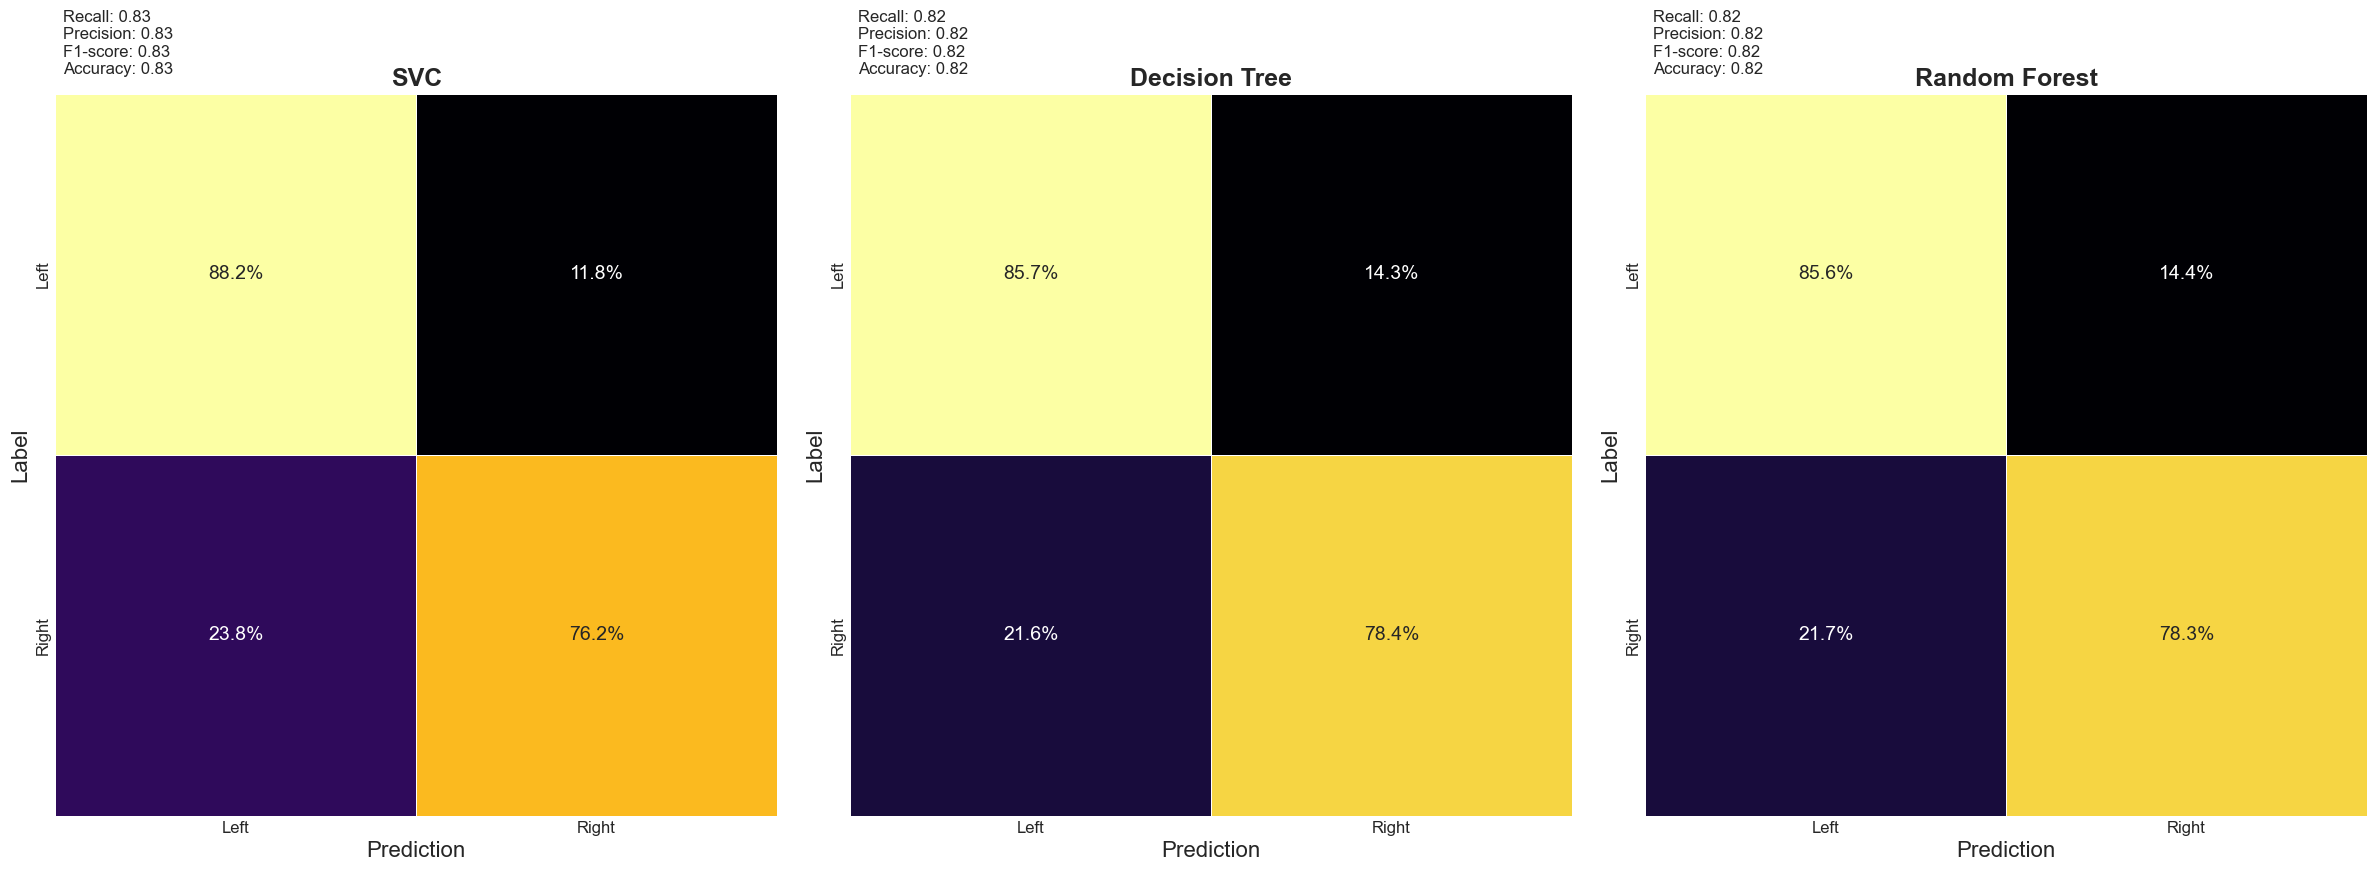

In [41]:
# Lista de modelos y sus predicciones
model_names = ['SVC', 'Decision Tree', 'Random Forest']
predictions = [y_pred_svm1, y_pred_dt1, y_pred_rf1]  # Predicciones en el orden correcto
true_labels = y_test1  # Etiquetas reales (común para todos los modelos)

# Clases del problema (ajustar según las clases reales)
classes = ['Left', 'Right']

# Configurar el tamaño del gráfico con subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 fila, 3 columnas

# Generación de matrices de confusión para cada modelo
for ax, model_name, y_pred in zip(axes, model_names, predictions):
    # Calcular métricas
    recall = recall_score(true_labels, y_pred, average='weighted')
    precision = precision_score(true_labels, y_pred, average='weighted')
    f1 = f1_score(true_labels, y_pred, average='weighted')
    acc = accuracy_score(true_labels, y_pred)

    # Crear la matriz de confusión
    matriz = confusion_matrix(true_labels, y_pred, normalize='true')

    # Dibujar la matriz de confusión en el subplot correspondiente
    sns.heatmap(matriz, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno',
                xticklabels=classes, yticklabels=classes, cbar=False, annot_kws={'size': 14}, ax=ax)

    # Etiquetas y título
    ax.set_title(f'{model_name}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Prediction', fontsize=16)
    ax.set_ylabel('Label', fontsize=16)

    # Agregar métricas como texto
    metrics_text = f'Recall: {round(recall, 2)}\nPrecision: {round(precision, 2)}\nF1-score: {round(f1, 2)}\nAccuracy: {round(acc, 2)}'
    ax.text(0.01, 1.07, metrics_text, va='center', transform=ax.transAxes, fontsize=12)

    # Ajustar tamaño de etiquetas
    ax.tick_params(axis='both', which='major', labelsize=12)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Elegimos RF

## Curva ROC & AUC

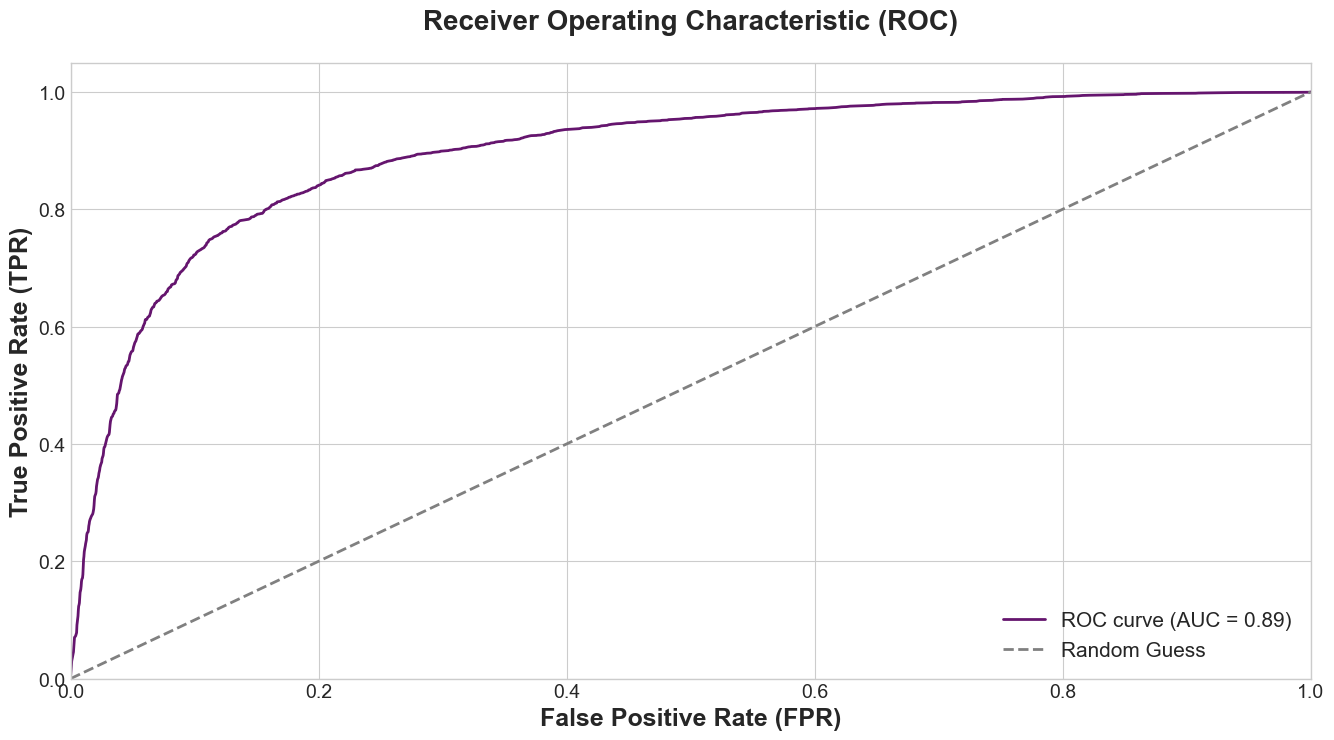

In [42]:
from sklearn.metrics import roc_curve, auc
# Calcular la curva ROC y el AUC para el modelo
fpr, tpr, thresholds = roc_curve(y_test1, rf_model.predict_proba(X_test1)[:, 1])
roc_auc = auc(fpr, tpr)

# Crear el gráfico de la curva ROC
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Graficar la curva ROC
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette('inferno')[1], lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Línea diagonal de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=18, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=18, fontweight='bold')
ax.set_title("Receiver Operating Characteristic (ROC)", pad=24, fontweight='bold', fontsize=20)
plt.legend(loc='lower right', fontsize=15)

# Ajustar tamaño del texto en los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.show()

# Principal Component Analysis (PCA) 

El Análisis de Componentes Principales (PCA) es una técnica de aprendizaje automático no supervisado. Es un método de reducción de dimensionalidad utilizado principalmente para identificar patrones en los datos y reducir su complejidad transformándolos en un conjunto de variables linealmente no correlacionadas llamadas componentes principales.

In [43]:
# Definir X (características) e y (target)
X2 = df_model_binario[['sex','age','region_custom','z1','z2']]
y2 = df_model_binario["Clasificacion_binaria"]

In [44]:
# Definir las columnas para PCA
columns_for_pca = ['z1', 'z2']

# Crear el PCA y ajustarlo a los datos
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X2[columns_for_pca])

# Agregar la primera componente principal como una nueva columna
X2['PCA1'] = X_pca

# Eliminar las columnas antiguas z1 y z2
X2 = X2.drop(columns=columns_for_pca)

In [45]:
X2.head()

,sex,age,region_custom,PCA1
0,1,27,0,0.066203
1,1,43,1,0.127622
2,0,39,1,-0.005003
3,1,34,1,-0.352959
4,0,37,1,-0.217306


In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [47]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred_rf2 = rf_model.predict(X_test2)

In [48]:
acc = metrics.accuracy_score(y_test, y_pred_rf2)
acc

0.8252051401145688

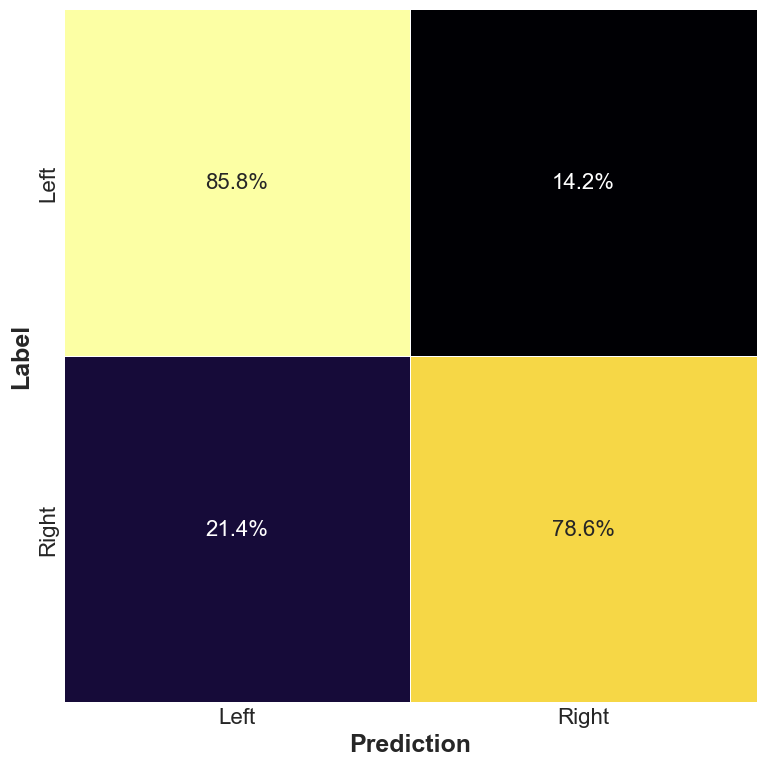

In [49]:
# Creación de la matriz de confusión
plt.figure(figsize=(9, 9))
matriz = confusion_matrix(y_test, y_pred_rf2, normalize='true')
classes = ['Left', 'Right']
sns.heatmap(matriz, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno', xticklabels=classes, yticklabels=classes, cbar=False,annot_kws={'size': 16})
plt.ylabel('Label', fontsize=18, fontweight='bold')
plt.xlabel('Prediction', fontsize=18, fontweight='bold')
all_sample_title = 'dim 2'
#plt.title(all_sample_title, size=15, fontweight='bold')

# Ajuste del tamaño de letra para las métricas
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Guardar la figura en la ruta 'figuras' con un título conveniente

plt.show()

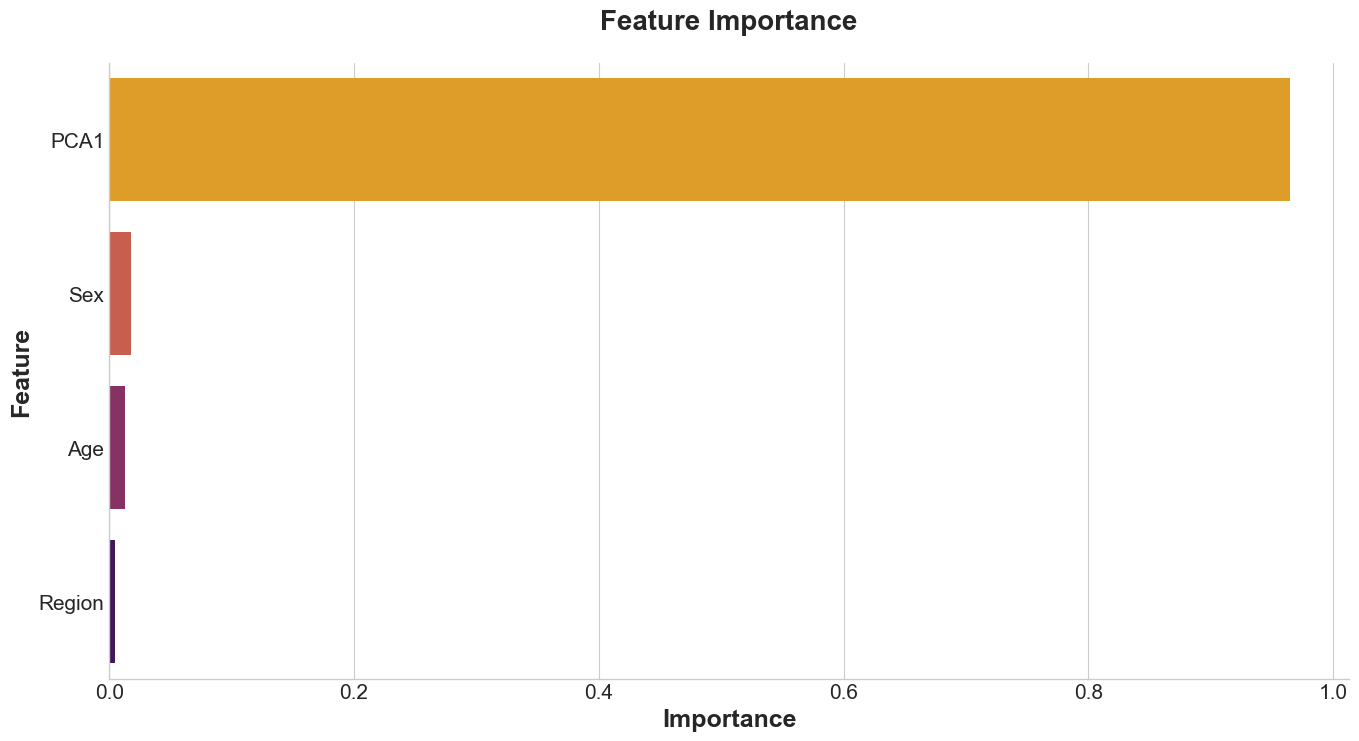

In [50]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Suponiendo que tienes tus datos de importancia de características y nombres de características
feature_importances = rf_model.feature_importances_
feature_names = ['Sex', 'Age', 'Region', 'PCA1']

# Obtener los índices ordenados de mayor a menor
sorted_indices = np.argsort(feature_importances)  # Orden descendente

# Reordenar los nombres de características y las importancias de características según los índices ordenados
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Crear un gráfico de barras para mostrar la importancia de las características ordenadas
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
colors = sns.color_palette('inferno', len(sorted_feature_importances))  # Obtener colores de la paleta 'inferno'
sns.barplot(y=sorted_feature_names, x=sorted_feature_importances, palette=colors, ax=ax)
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names, fontsize=15)
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Feature', fontsize=18, fontweight='bold')
plt.setp(ax.get_xticklabels(), fontsize=15)
ax.set_title("Feature Importance", pad=24, fontweight=700, fontsize=20)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()